In [ ]:
# Importación de librerías

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Paso 1.

In [7]:
# Carga de datos
df = pd.read_csv('./data/dynamic_pricing.csv')

1) Regresión Lineal Simple. Implementar dos modelos de regresión simple teniendo como variable de respuesta el costo histórico del viaje y como variable independiente el número de viajes pasados y el otro modelo tomar como variable de respuesta el costo histórico del viaje y como variable independiente la duración del viaje siga las siguientes actividades:

- Calcular la ecuación de regresión, interpretar los parámetros (intercepto y coeficiente de regresión) e indicar si son significativos de acuerdo con el tstatistic.
- Hacer el scatterplot con la línea de regresión, indicar lo que dice el gráfico
- Obtener los residuos y valores ajustados, la gráfica correspondiente y el análisis de residuos.
- Extraer conclusiones del modelo de regresión simple.


MODELO 1: Costo histórico vs Número de viajes pasados
                               OLS Regression Results                              
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.285
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):              0.257
Time:                             21:09:59   Log-Likelihood:                -6649.8
No. Observations:                     1000   AIC:                         1.330e+04
Df Residuals:                          998   BIC:                         1.331e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------

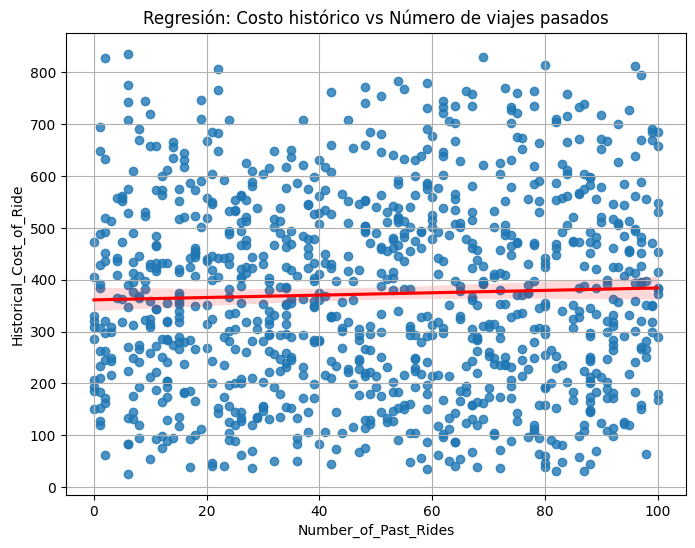

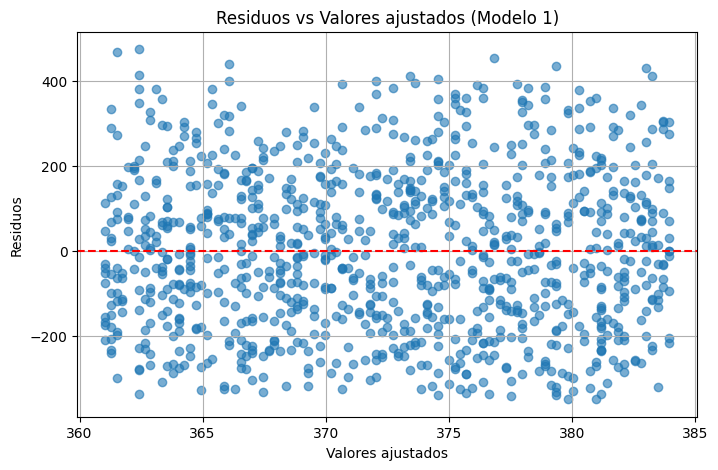

In [ ]:
print("MODELO 1: Costo histórico vs Número de viajes pasados")
# Modelo de regresión lineal simple, ols recibe la fórmula como string Y ~ X
model1 = smf.ols("Historical_Cost_of_Ride ~ Number_of_Past_Rides", data=df).fit()
print(model1.summary())

# Scatterplot + línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x="Number_of_Past_Rides", y="Historical_Cost_of_Ride", data=df, line_kws={"color": "red"})
plt.title("Regresión: Costo histórico vs Número de viajes pasados")
plt.grid(True)
plt.show()

# Valores ajustados y residuos
df["fitted1"] = model1.fittedvalues
df["residuals1"] = model1.resid

# Graficar residuos vs valores ajustados
plt.figure(figsize=(8, 5))
plt.scatter(df["fitted1"], df["residuals1"], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores ajustados (Modelo 1)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

## Modelo 1: Regresión Lineal Simple  
**Variable dependiente:** `Historical_Cost_of_Ride`  
**Variable independiente:** `Number_of_Past_Rides`

---

### Ecuación del modelo:
\[
\widehat{Costo} = 361.05 + 0.2289 \times \text{Número de viajes pasados}
\]

---

### Interpretación de los coeficientes:

- **Intercepto (`Intercept = 361.05`)**
  Cuando el número de viajes pasados es 0, el costo histórico promedio estimado del viaje es de aproximadamente **\$361.05**.

- **Coeficiente (`Number_of_Past_Rides = 0.2289`)**
  Por cada viaje adicional en el historial del cliente, el costo histórico del viaje se incrementa en promedio **\$0.23**.

---

### Significancia estadística:

- **Valor p del coeficiente:** `0.257`
  No es estadísticamente significativo (**p > 0.05**), lo que indica que **no hay suficiente evidencia** para afirmar que el número de viajes pasados afecta el costo histórico del viaje.

- **R-cuadrado:** `0.001`
  Este valor extremadamente bajo indica que el modelo **solo explica el 0.1% de la variabilidad** en el costo histórico. En otras palabras, **el modelo no ajusta bien a los datos**.

---

### Análisis gráfico:

- **Gráfico de dispersión con línea de regresión:**
  Se observa una nube de puntos sin tendencia clara. La línea de regresión es casi horizontal, lo que refuerza la débil relación entre las variables.

- **Gráfico de residuos:**
  Los residuos se distribuyen de manera aleatoria alrededor de 0, lo que indica que **no hay patrones evidentes de heterocedasticidad o no linealidad**. Sin embargo, la dispersión alta sugiere que el modelo **no realiza buenas predicciones**.

---

### Conclusión del Modelo 1:

- El modelo tiene **muy baja capacidad explicativa** y su coeficiente no es significativo.
- El número de viajes pasados **no es un predictor útil** del costo histórico.
- Este modelo **no es recomendable para predicción** del costo histórico del viaje.



MODELO 2: Costo histórico vs Duración esperada del viaje
                               OLS Regression Results                              
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.860
Model:                                 OLS   Adj. R-squared:                  0.860
Method:                      Least Squares   F-statistic:                     6148.
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                             21:22:25   Log-Likelihood:                -5666.1
No. Observations:                     1000   AIC:                         1.134e+04
Df Residuals:                          998   BIC:                         1.135e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------

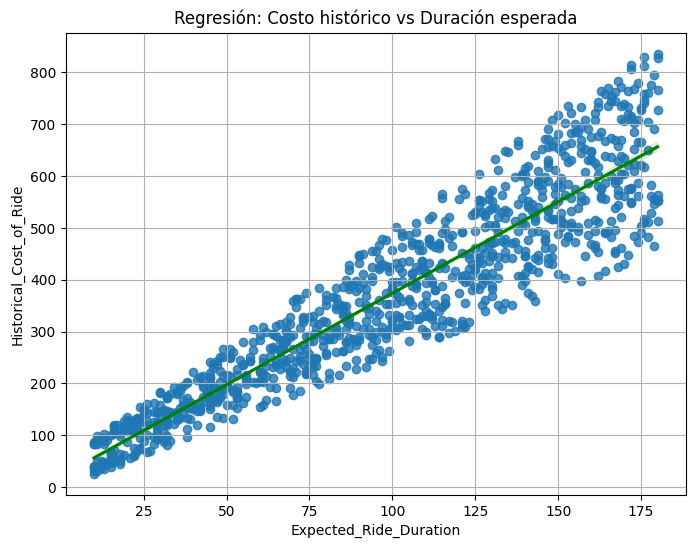

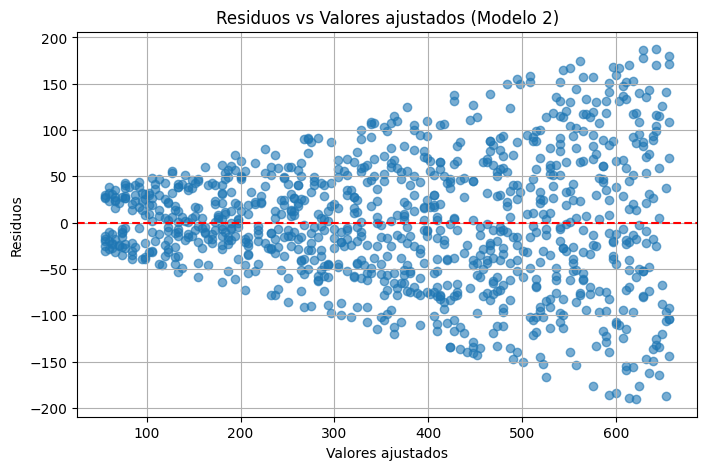

In [ ]:
# ---------- MODELO 2: Costo histórico ~ Duración esperada del viaje ----------
print("MODELO 2: Costo histórico vs Duración esperada del viaje")
model2 = smf.ols("Historical_Cost_of_Ride ~ Expected_Ride_Duration", data=df).fit()
print(model2.summary())

# Scatterplot + línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x="Expected_Ride_Duration", y="Historical_Cost_of_Ride", data=df, line_kws={"color": "green"})
plt.title("Regresión: Costo histórico vs Duración esperada")
plt.grid(True)
plt.show()

# Valores ajustados y residuos
df["fitted2"] = model2.fittedvalues
df["residuals2"] = model2.resid

plt.figure(figsize=(8, 5))
plt.scatter(df["fitted2"], df["residuals2"], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores ajustados (Modelo 2)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

## Modelo 2: Regresión Lineal Simple  
**Variable dependiente:** `Historical_Cost_of_Ride`  
**Variable independiente:** `Expected_Ride_Duration`

---

### Ecuación del modelo:
\[
\widehat{Costo} = 20.87 + 3.53 \times \text{Duración esperada del viaje}
\]

---

### Interpretación de los coeficientes:

- **Intercepto (`Intercept = 20.87`)**  
  Cuando la duración esperada del viaje es 0 minutos (caso teórico), el costo histórico promedio estimado sería de **\$20.87**.

- **Coeficiente (`Expected_Ride_Duration = 3.53`)**  
  Por cada minuto adicional en la duración esperada del viaje, el costo histórico promedio se incrementa en **\$3.53**.

---

### Significancia estadística:

- **Valor p del coeficiente:** `0.000`  
  El coeficiente es altamente significativo (**p < 0.05**), lo que indica una **fuerte evidencia estadística** de que la duración esperada del viaje influye en el costo.

- **R-cuadrado:** `0.860`  
  El modelo explica el **86% de la variabilidad** en el costo histórico del viaje. Esto indica un excelente ajuste del modelo a los datos.

---

### Análisis gráfico:

- **Gráfico de dispersión con línea de regresión:**  
  Se observa una relación claramente lineal positiva: a mayor duración del viaje, mayor es el costo. La línea de regresión ajusta muy bien a la nube de puntos.

- **Gráfico de residuos:**  
  Aunque los residuos están centrados alrededor de cero, existe cierta dispersión creciente con los valores ajustados (posible heterocedasticidad leve). Aun así, no se observan patrones severos que invaliden el modelo.

---

### Conclusión del Modelo 2:

- El modelo tiene **excelente capacidad predictiva**.
- La duración esperada del viaje es un **fuerte predictor** del costo histórico.
- Este modelo **sí es recomendable** para realizar predicciones de costo histórico basadas en la duración.


#   Regresión Lineal Múltiple. Implementar un modelo de regresión múltiple teniendo como variable de respuesta el costo histórico del viaje y como variables independientes el número de pasajeros, número de conductores, número de viajes pasados y duración el viaje esperado, siga las siguientes actividades:
- Calcular la ecuación de regresión, interpretar los coeficientes betas.
- Del resumen del modelo, indicar las variables significativas de acuerdo con el Pvalue.
- Hacer la evaluación de modelo, con cada uno de sus componentes: RSE, RSEM, R-cuadrado, R-cuadrado ajustado.
- Extraer conclusiones del modelo de regresión múltiple.
